In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

Сгенерируем выборку $y = 0.5x + 1 + \epsilon$

In [2]:
x = np.arange(-250, 250)
y = 0.5*x + np.ones(len(x)) + \
            np.random.normal(scale=np.sqrt(0.2), size=len(x))

<IPython.core.display.Javascript object>


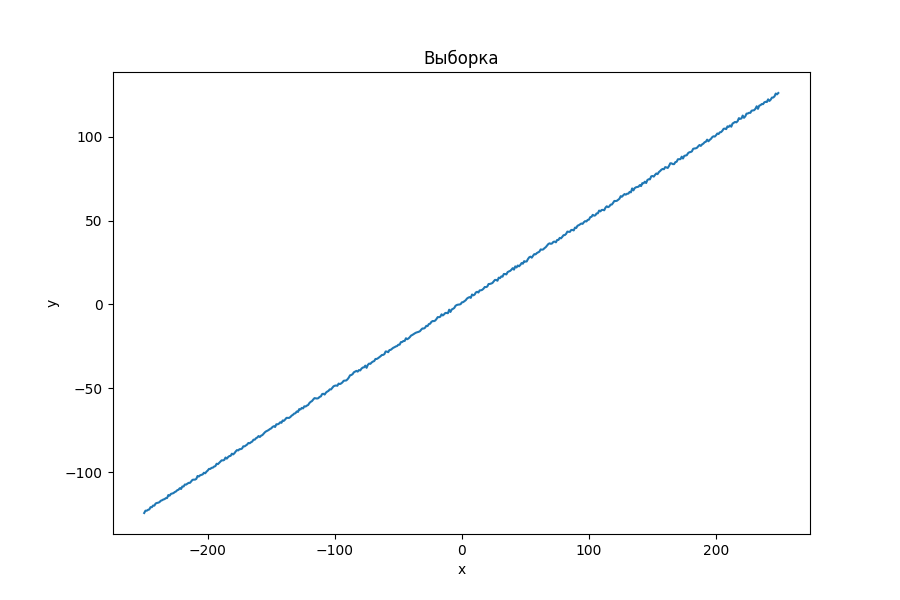

In [3]:
fig, ax = plt.subplots(figsize=(9, 6))
plt.title(u'Выборка')
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, y)
plt.show()

Минимизируем квадрат отклонений

In [4]:
from scipy.optimize import minimize

def linear_func(x, k, b):
    return k*x + b

def MSE(true_values, func_values):
    return np.mean((true_values - func_values)**2)

k, b = minimize(lambda kb: MSE(y, linear_func(x, kb[0], kb[1])), [0, 0]).x

<IPython.core.display.Javascript object>


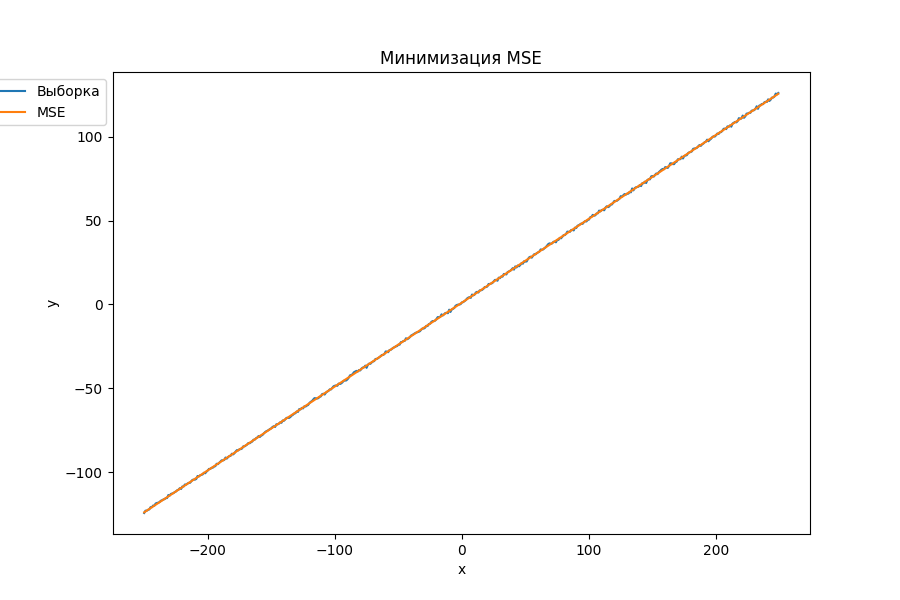

In [5]:
fig, ax = plt.subplots(figsize=(9, 6))
plt.title(u'Минимизация MSE')
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, y)
ax.plot(x, linear_func(x, k, b))
ax.legend([u'Выборка', 'MSE'], bbox_to_anchor = (0, 1))
plt.show()

Добавим выбросы $y = -1 + \epsilon$

In [6]:
x = np.hstack((x, np.random.random(size=75)*500 - 250))
y = np.hstack((y, np.random.normal(scale=np.sqrt(0.2), size=75) - 1))
x, y = np.transpose(sorted(np.transpose(np.vstack((x, y))), key=lambda x: x[0]))

<IPython.core.display.Javascript object>


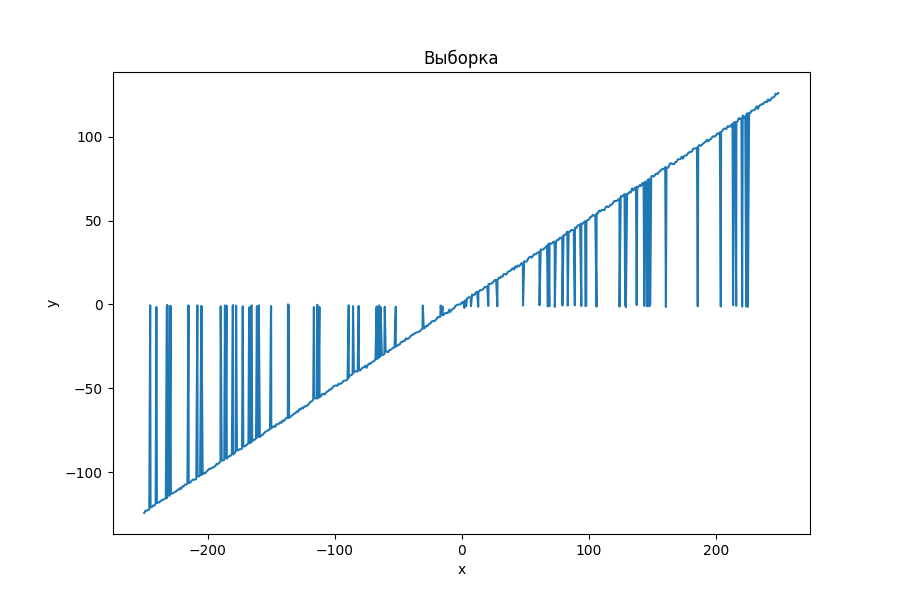

In [7]:
fig, ax = plt.subplots(figsize=(9, 6))
plt.title(u'Выборка')
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, y)
plt.show()

In [8]:
def MAE(true_values, func_values):
    return np.mean(np.abs(true_values - func_values))

k_mse, b_mse = minimize(lambda kb: MSE(y, linear_func(x, kb[0], kb[1])), [0, 0]).x
k_mae, b_mae = minimize(lambda kb: MAE(y, linear_func(x, kb[0], kb[1])), [0, 0]).x

<IPython.core.display.Javascript object>


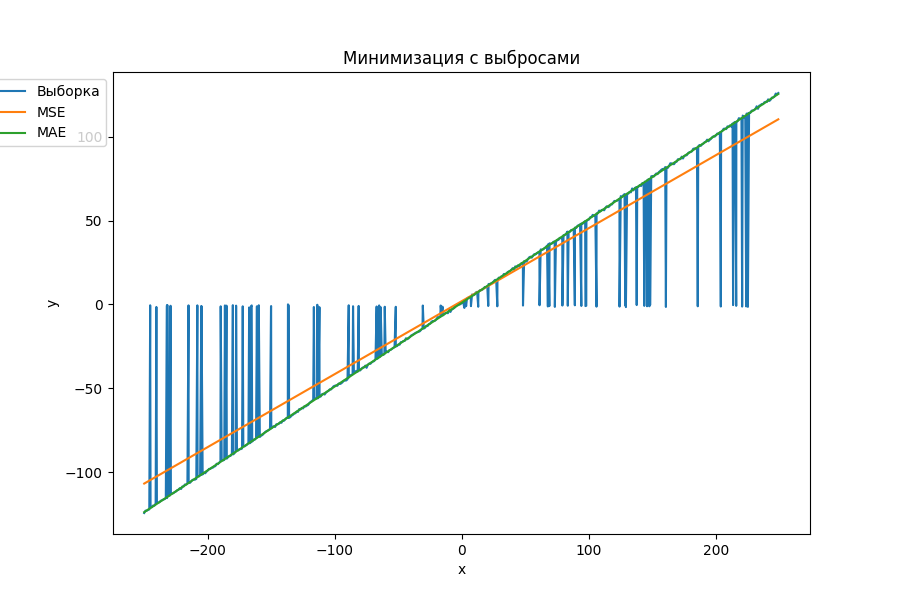

In [9]:
fig, ax = plt.subplots(figsize=(9, 6))
plt.title(u'Минимизация с выбросами')
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, y)
ax.plot(x, linear_func(x, k_mse, b_mse))
ax.plot(x, linear_func(x, k_mae, b_mae))
ax.legend([u'Выборка', 'MSE', 'MAE'], bbox_to_anchor = (0, 1))
plt.show()

### Вывод

Как видно из графиков, MSE слабо устойчиво к выбросам, в отличие от MAE, хорошо устойчивой к выбросам.